Notebook for parsing GEMMA database metadata to identify brain datasets. The metadata file `EETag_Dump.tsv` is the GEMMA metadata aquired directly from the corresponding authors of GEMMA on November 26th, 2019

In this analysis we read in the metadata and filtered according to the diagram in Supplementary Figure 3A

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
metadata_raw = pd.read_csv('/home/bharris/biccn_paper/data/bulk_rna/EETag_Dump.tsv',index_col=0,delimiter='\t')

In [3]:
metadata_raw.head()

,ee.Taxon,ee.NumSample,ad.Name,ad.IsSequencing,ee.TagVal,ee.TagURI
ee.Name,,,,,,
GSE2018,human,34,GPL96,False,lung,http://purl.obolibrary.org/obo/UBERON_0002048
GSE2018,human,34,GPL96,False,respiratory epithelial cell,http://purl.obolibrary.org/obo/CL_0002368
GSE2018,human,34,GPL96,False,Transplanted Organ Complication,http://purl.obolibrary.org/obo/DOID_556
GSE4523,mouse,6,GPL1261,False,Mfi2 [mouse] antigen p97 (melanoma associated)...,http://purl.org/commons/record/ncbi_gene/30060
GSE4523,mouse,6,GPL1261,False,Homozygous negative,http://purl.obolibrary.org/obo/TGEMO_00001


In [4]:
np.unique(metadata_raw.index).shape

(8115,)

In [5]:
bulk_rna_all = metadata_raw[metadata_raw['ee.NumSample'] >= 20]

In [6]:
np.unique(bulk_rna_all.index).shape

(4876,)

In [7]:
bulk_rna_all = bulk_rna_all[bulk_rna_all['ad.IsSequencing']]

In [8]:
np.unique(bulk_rna_all.index).shape

(300,)

In [9]:
bulk_rna_all = bulk_rna_all[bulk_rna_all['ee.Taxon']=='mouse']

In [10]:
np.unique(bulk_rna_all.index).shape

(210,)

In [11]:
maybe_terms = ['astrocyte','microglial cell','neuron stem cell','glial cell']

In [ ]:
bulk_rna_all[bulk_rna_all['ee.TagVal'].isin(terms)].reset_index().drop_duplicates('ee.Name')

In [13]:
(bulk_rna_all['ee.TagVal'] =='brain').sum()

22

In [14]:
terms = [
    'brain', 'cerebellum', 'cerebral cortex', 'striatum', 'prefrontal cortex',
    'neuron', 'frontal cortex', 'amygdala', 'hypothalamus',
    'CA1 field of hippocampus', 'neocortex', 'striatum',
    'arcuate nucleus of hypothalamus',
    'dentate gyrus of hippocampal formation', 'neuron of cerebral cortex',
    'cerebellar cortex', 'primary visual cortex', 'preoptic area',
    'dorsomedial nucleus of hypothalamus', 'pons',
    'ventromedial nucleus of hypothalamus', 'CA3 field of hippocampus',
    'hippocampus','Pvalb [mouse] parvalbumin','dentate gyrus polymorphic layer','primary motor cortex','somatosensory cortex','forebrain'
]

In [15]:
bulk_rna_all['ee.TagVal'].value_counts().index.shape

(591,)

In [16]:
search_terms = []
for i in bulk_rna_all['ee.TagVal'].value_counts().index.values:
    if 'cortex' in i:
        print(i)
        search_terms.append(i)
    elif 'brain' in i:
        print(i)
        search_terms.append(i)
    elif 'hypothalamus' in i:
        print(i)
        search_terms.append(i)
    elif 'hippocampus' in i:
        print(i)
        search_terms.append(i)
    elif 'hippocampal' in i:
        print(i)
        search_terms.append(i)

brain
cerebral cortex
CA1 field of hippocampus
prefrontal cortex
frontal cortex
hypothalamus
neuron of cerebral cortex
visual cortex
dentate gyrus of hippocampal formation
neocortex
arcuate nucleus of hypothalamus
ventromedial nucleus of hypothalamus
Traumatic brain injury
brainstem
dorsomedial nucleus of hypothalamus
paraventricular nucleus of hypothalamus
CA3 field of hippocampus
anterior lateral motor cortex
hippocampal formation
entorhinal cortex layer 6
cerebellar cortex
entorhinal cortex
dentate gyrus of hippocampal formation granule cell
forebrain
primary visual cortex
embryonic brain
primary motor cortex
hippocampus
somatosensory cortex
central gray substance of midbrain


In [17]:
len(search_terms)

30

In [18]:
search_terms.remove('Traumatic brain injury')
search_terms.remove('embryonic brain')

In [19]:
selected_datasets = bulk_rna_all[bulk_rna_all['ee.TagVal'].isin(
    search_terms)].reset_index().drop_duplicates('ee.Name')

In [20]:
for i in metadata_raw.loc[selected_datasets['ee.Name']]['ee.TagVal'].value_counts().index:
    print(i)

C57BL/6
brain
C57BL/6J
Homozygous negative
male
cerebral cortex
[SUBSET]
female
Adult
Overexpression
RNA-seq of coding RNA
CA1 field of hippocampus
neuron
prefrontal cortex
cerebellum
heart
liver
frontal cortex
Heterozygous
Ammon's horn
FVB
hypothalamus
microglial cell
APP [human] amyloid beta (A4) precursor protein
astrocyte
lung
embryo stage
dentate gyrus of hippocampal formation
PSEN1 [human] presenilin 1
neuron of cerebral cortex
kidney
arcuate nucleus of hypothalamus
neocortex
Alzheimer's disease
testis
visual cortex
[Sample Study]
brainstem
adrenal gland
fasting
Traumatic brain injury
ventromedial nucleus of hypothalamus
embryonic stem cell
spleen
thymus
neuronal stem cell
lipopolysaccharide
dorsomedial nucleus of hypothalamus
schizophrenia
129/Sv
paraventricular nucleus of hypothalamus
Tardbp [mouse] TAR DNA binding protein
high fat diet
neonate
radial glial cell
infant
late adult stage
HTT [human] huntingtin
vastus lateralis
Pvalb [mouse] parvalbumin
olfactory bulb
nuclear RNA 

In [21]:
metadata_raw[metadata_raw['ee.TagVal'].isin(['GRO-seq','sRNA-Seq'])].index

Index(['GSE90988', 'GSE83474', 'GSE95649'], dtype='object', name='ee.Name')

In [22]:
final_datasets = selected_datasets.set_index('ee.Name').drop(
    ['GSE83474', 'GSE95649'], axis=0).sort_values('ee.NumSample',
                                                  ascending=False)
final_datasets

,ee.Taxon,ee.NumSample,ad.Name,ad.IsSequencing,ee.TagVal,ee.TagURI
ee.Name,,,,,,
GSE65770,mouse,168,Generic_mouse_ensemblIds,True,cerebral cortex,http://purl.obolibrary.org/obo/UBERON_0000956
GSE75386,mouse,108,Generic_mouse_ncbiIds,True,hippocampus,http://purl.obolibrary.org/obo/EHDAA2_0004443
GSE54651,mouse,96,Generic_mouse_ensemblIds,True,hypothalamus,http://purl.obolibrary.org/obo/UBERON_0001898
GSE77243,mouse,75,Generic_mouse_ensemblIds,True,visual cortex,http://purl.obolibrary.org/obo/UBERON_0000411
GSE104775,mouse,72,Generic_mouse_ensemblIds,True,cerebral cortex,http://purl.obolibrary.org/obo/UBERON_0000956
...,...,...,...,...,...,...
GSE99353,mouse,20,Generic_mouse_ensemblIds,True,frontal cortex,http://purl.obolibrary.org/obo/UBERON_0001870
GSE96938,mouse,20,Generic_mouse_ensemblIds,True,brain,http://purl.obolibrary.org/obo/UBERON_0000955
GSE103194,mouse,20,Generic_mouse_ensemblIds,True,brain,http://purl.obolibrary.org/obo/UBERON_0000955


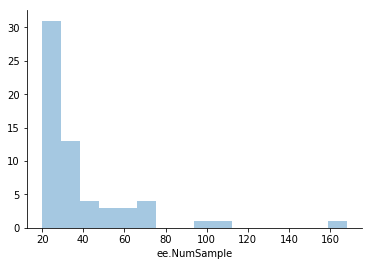

In [23]:
sns.distplot(final_datasets['ee.NumSample'], kde=False)
sns.despine()
plt.show()

In [124]:
np.savetxt(
    '/home/bharris/biccn_paper/data/bulk_rna/selected_gemma_datasets.txt',
    final_datasets.index.values,
    fmt='%s')